In [492]:
import pandas as pd

# №1

In [493]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [494]:
data.shape

(1000, 21)

# №2

In [495]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [496]:
data.dtypes

status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors              object
present_residence          object
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits             object
job                        object
people_liable              object
telephone                  object
foreign_worker             object
credit_risk                object
dtype: object

In [497]:
kolichestvennie = ['duration', 'amount', 'age']
binarnie = ['telephone', 'foreign_worker', 'credit_risk', 'people_liable']
porjadkovie = ['status', 'credit_history', 'savings', 'employment_duration',
               'installment_rate', 'present_residence', 'number_credits']
kategorialnie = ['purpose', 'personal_status_sex', 'other_debtors', 'property',
                 'other_installment_plans', 'housing', 'job']

In [498]:
data['people_liable'].unique()

array(['0 to 2', '3 or more'], dtype=object)

# №3

In [499]:
data.groupby('purpose')['amount'].mean().round()

purpose
business               8209.0
car (new)              5370.0
car (used)             3067.0
domestic appliances    2728.0
furniture/equipment    2488.0
others                 3063.0
radio/television       1498.0
repairs                3180.0
retraining             4158.0
vacation               1206.0
Name: amount, dtype: float64

# №4

In [500]:
data[(data['age'] < 30) & (data['housing']=='rent')].shape[0]/data.shape[0]*100

24.6

In [501]:
data[(data['age'] > 40) & (data['housing']=='rent')].shape[0]/data.shape[0]*100

18.5

# №5

In [502]:
data["number_credits"] = data["number_credits"].map({"1":0, "2-3":1, "4-5":2, ">= 6":3})
data[(data['foreign_worker']=='yes') & (data['number_credits'] >= 2)].shape[0]

1

# №6

In [503]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

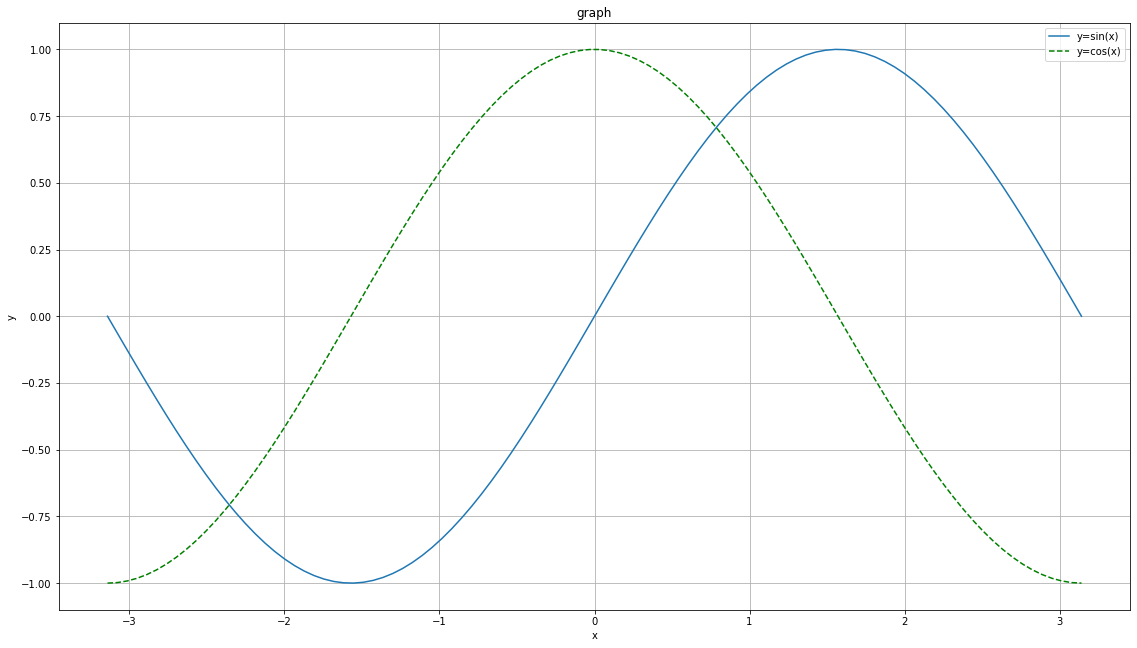

In [504]:
x_1 = np.linspace(-np.pi, np.pi, 100)
plt.figure(figsize=(19.20, 10.80))
plt.plot(x_1, np.sin(x_1), label='y=sin(x)')
plt.plot(x_1, np.cos(x_1), '--', label='y=cos(x)', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('graph')
plt.grid()
plt.legend()

# №7

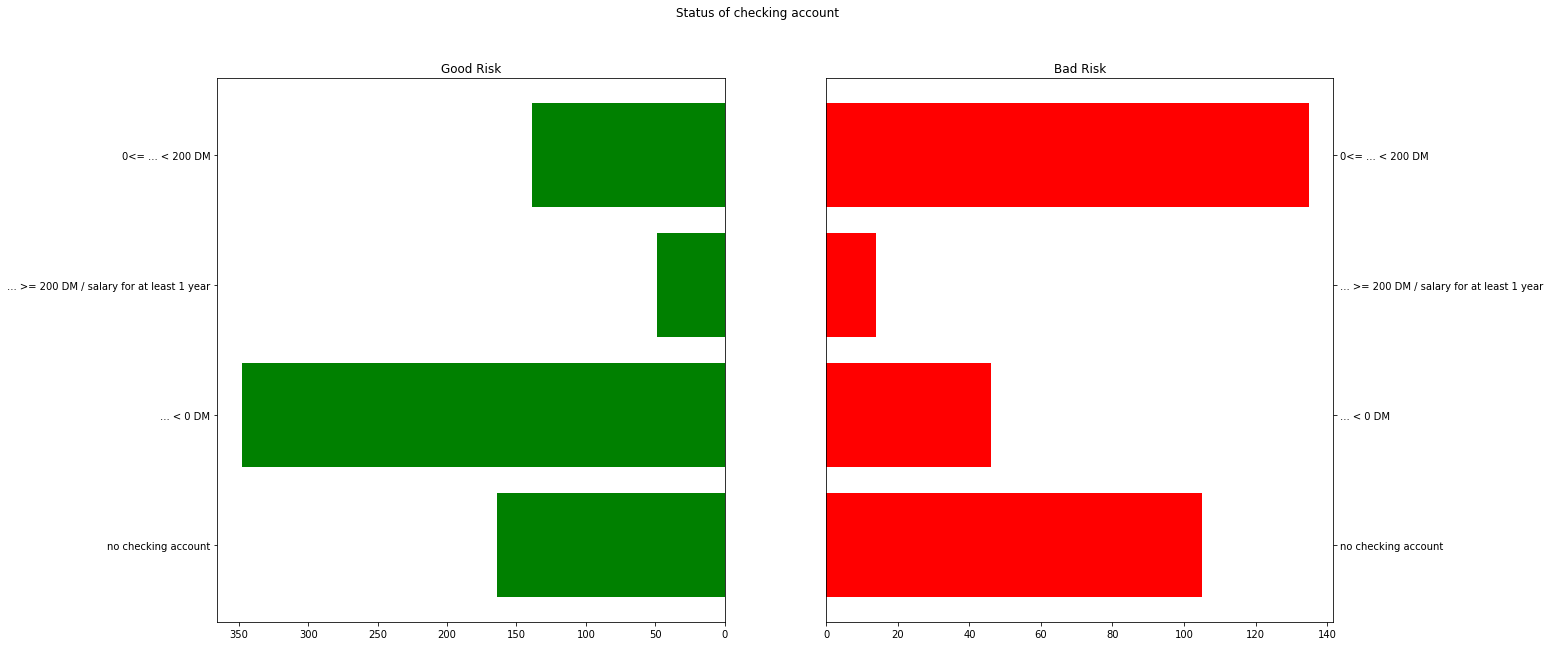

In [505]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Status of checking account')
axs[0].barh(data['status'].unique(), data[data['credit_risk']=='good'].groupby('status')['credit_risk'].value_counts(), color='green')
axs[1].barh(data['status'].unique(), data[data['credit_risk']=='bad'].groupby('status')['credit_risk'].value_counts(), color='red')
axs[1].set_title('Bad Risk')
axs[0].set_title('Good Risk')
axs[0].invert_xaxis()
axs[1].yaxis.tick_right()

# №8

In [506]:
import seaborn as sns

<AxesSubplot:xlabel='savings', ylabel='count'>

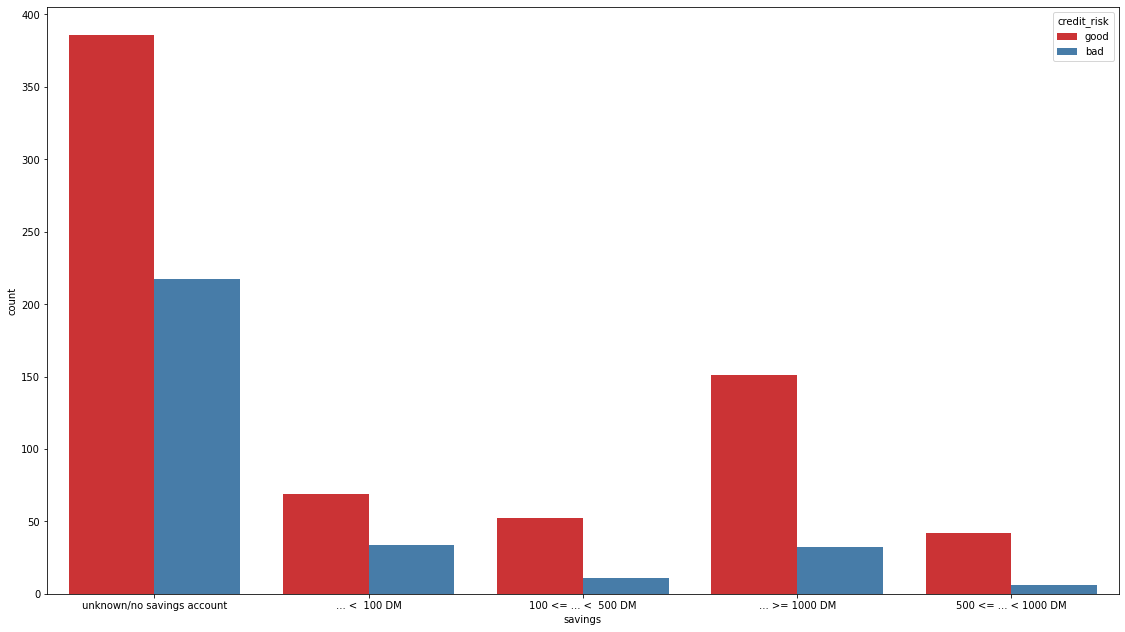

In [507]:
plt.figure(figsize=(19.20, 10.80))
sns.countplot(x="savings", hue='credit_risk', data=data, palette="Set1")

# №9

<AxesSubplot:xlabel='savings', ylabel='age'>

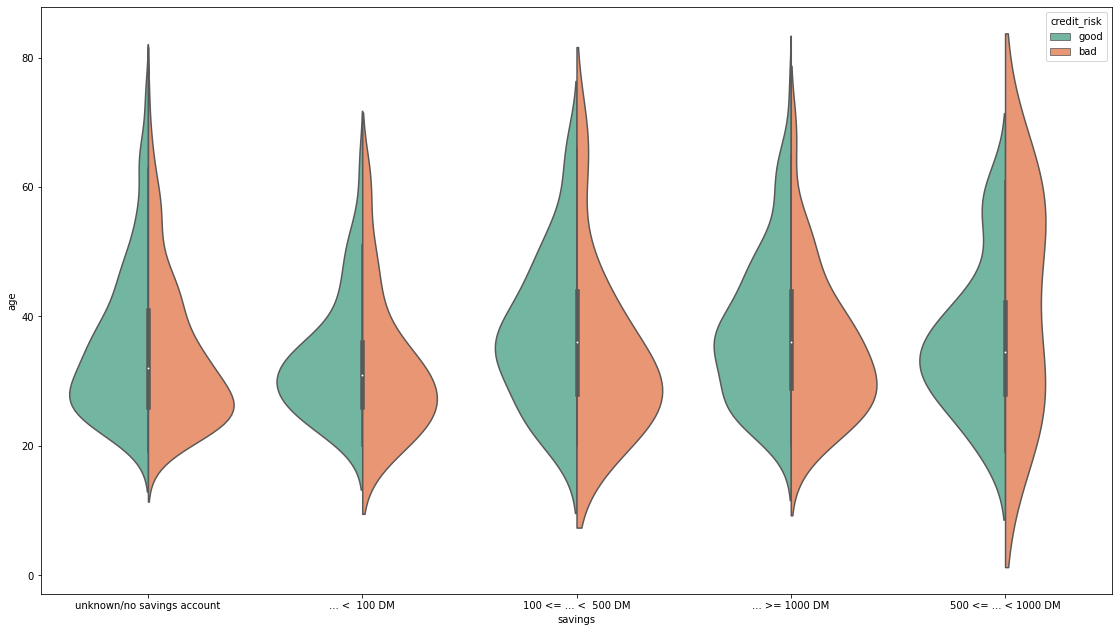

In [508]:
plt.figure(figsize=(19.20, 10.80))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True, palette='Set2')

# №10

<AxesSubplot:xlabel='age', ylabel='count'>

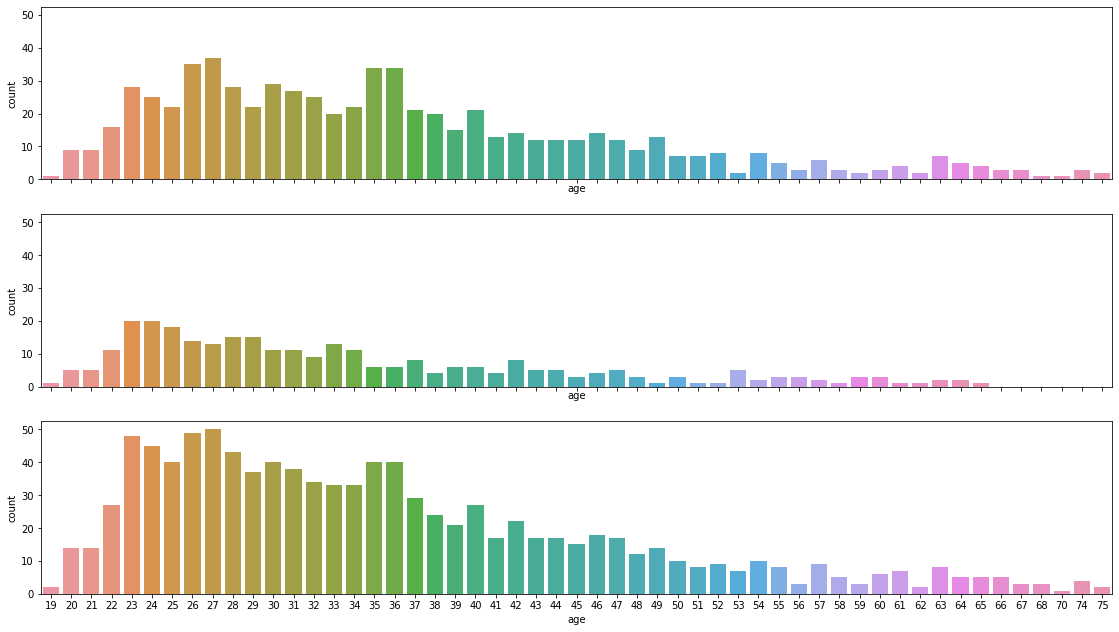

In [509]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(19.20, 10.80), sharex=True, sharey=True)
sns.countplot(x=data[(data['credit_risk']=='good')]['age'], data=data, ax=ax1)
sns.countplot(x=data[(data['credit_risk']=='bad')]['age'], data=data, ax=ax2)
sns.countplot(x="age", data=data, ax=ax3)

(array([150., 259., 178., 158.,  89.,  70.,  42.,  26.,  21.,   7.]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <BarContainer object of 10 artists>)

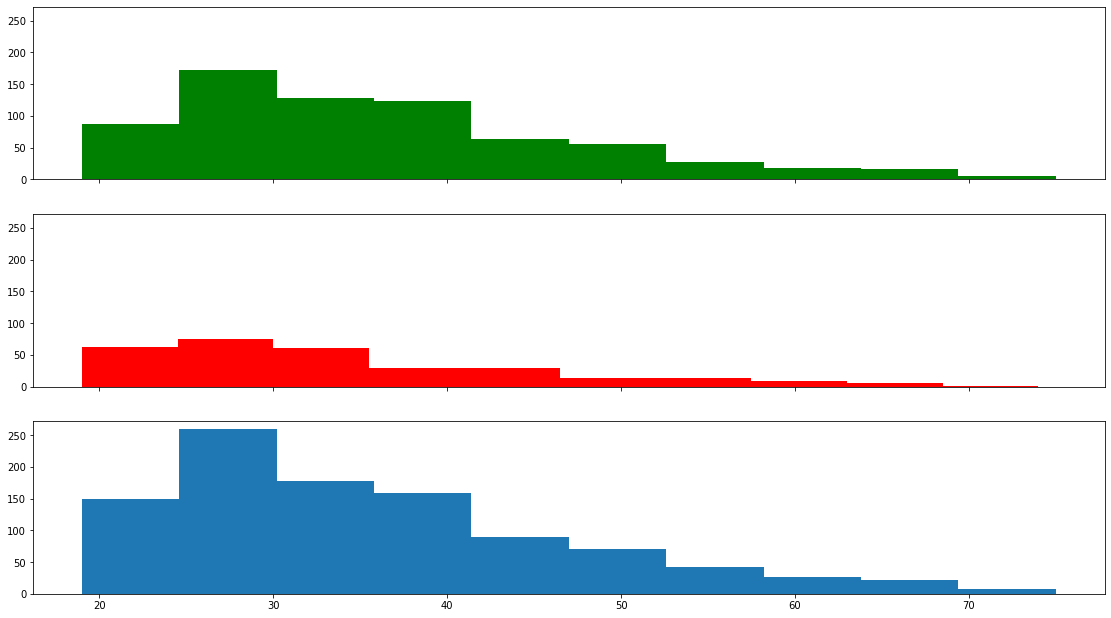

In [510]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(19.20, 10.80), sharex=True, sharey=True)
ax1.hist(x=data[(data['credit_risk']=='good')]['age'], color='green')
ax2.hist(x=data[(data['credit_risk']=='bad')]['age'], color='red')
ax3.hist(x=data['age'])

# №11

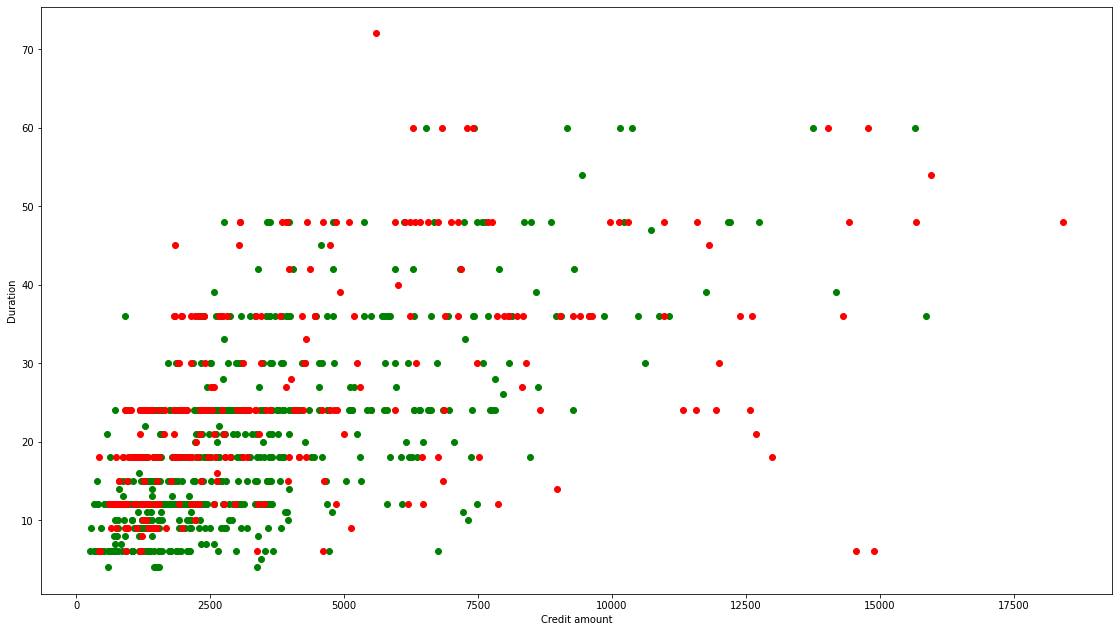

In [511]:
plt.figure(figsize=(19.20, 10.80))
plt.ylabel('Duration')
plt.xlabel('Credit amount')
plt.scatter(data[data['credit_risk']=='good']['amount'], data[data['credit_risk']=='good']['duration'], color='green')
plt.scatter(data[data['credit_risk']=='bad']['amount'], data[data['credit_risk']=='bad']['duration'], color='red')

# №12

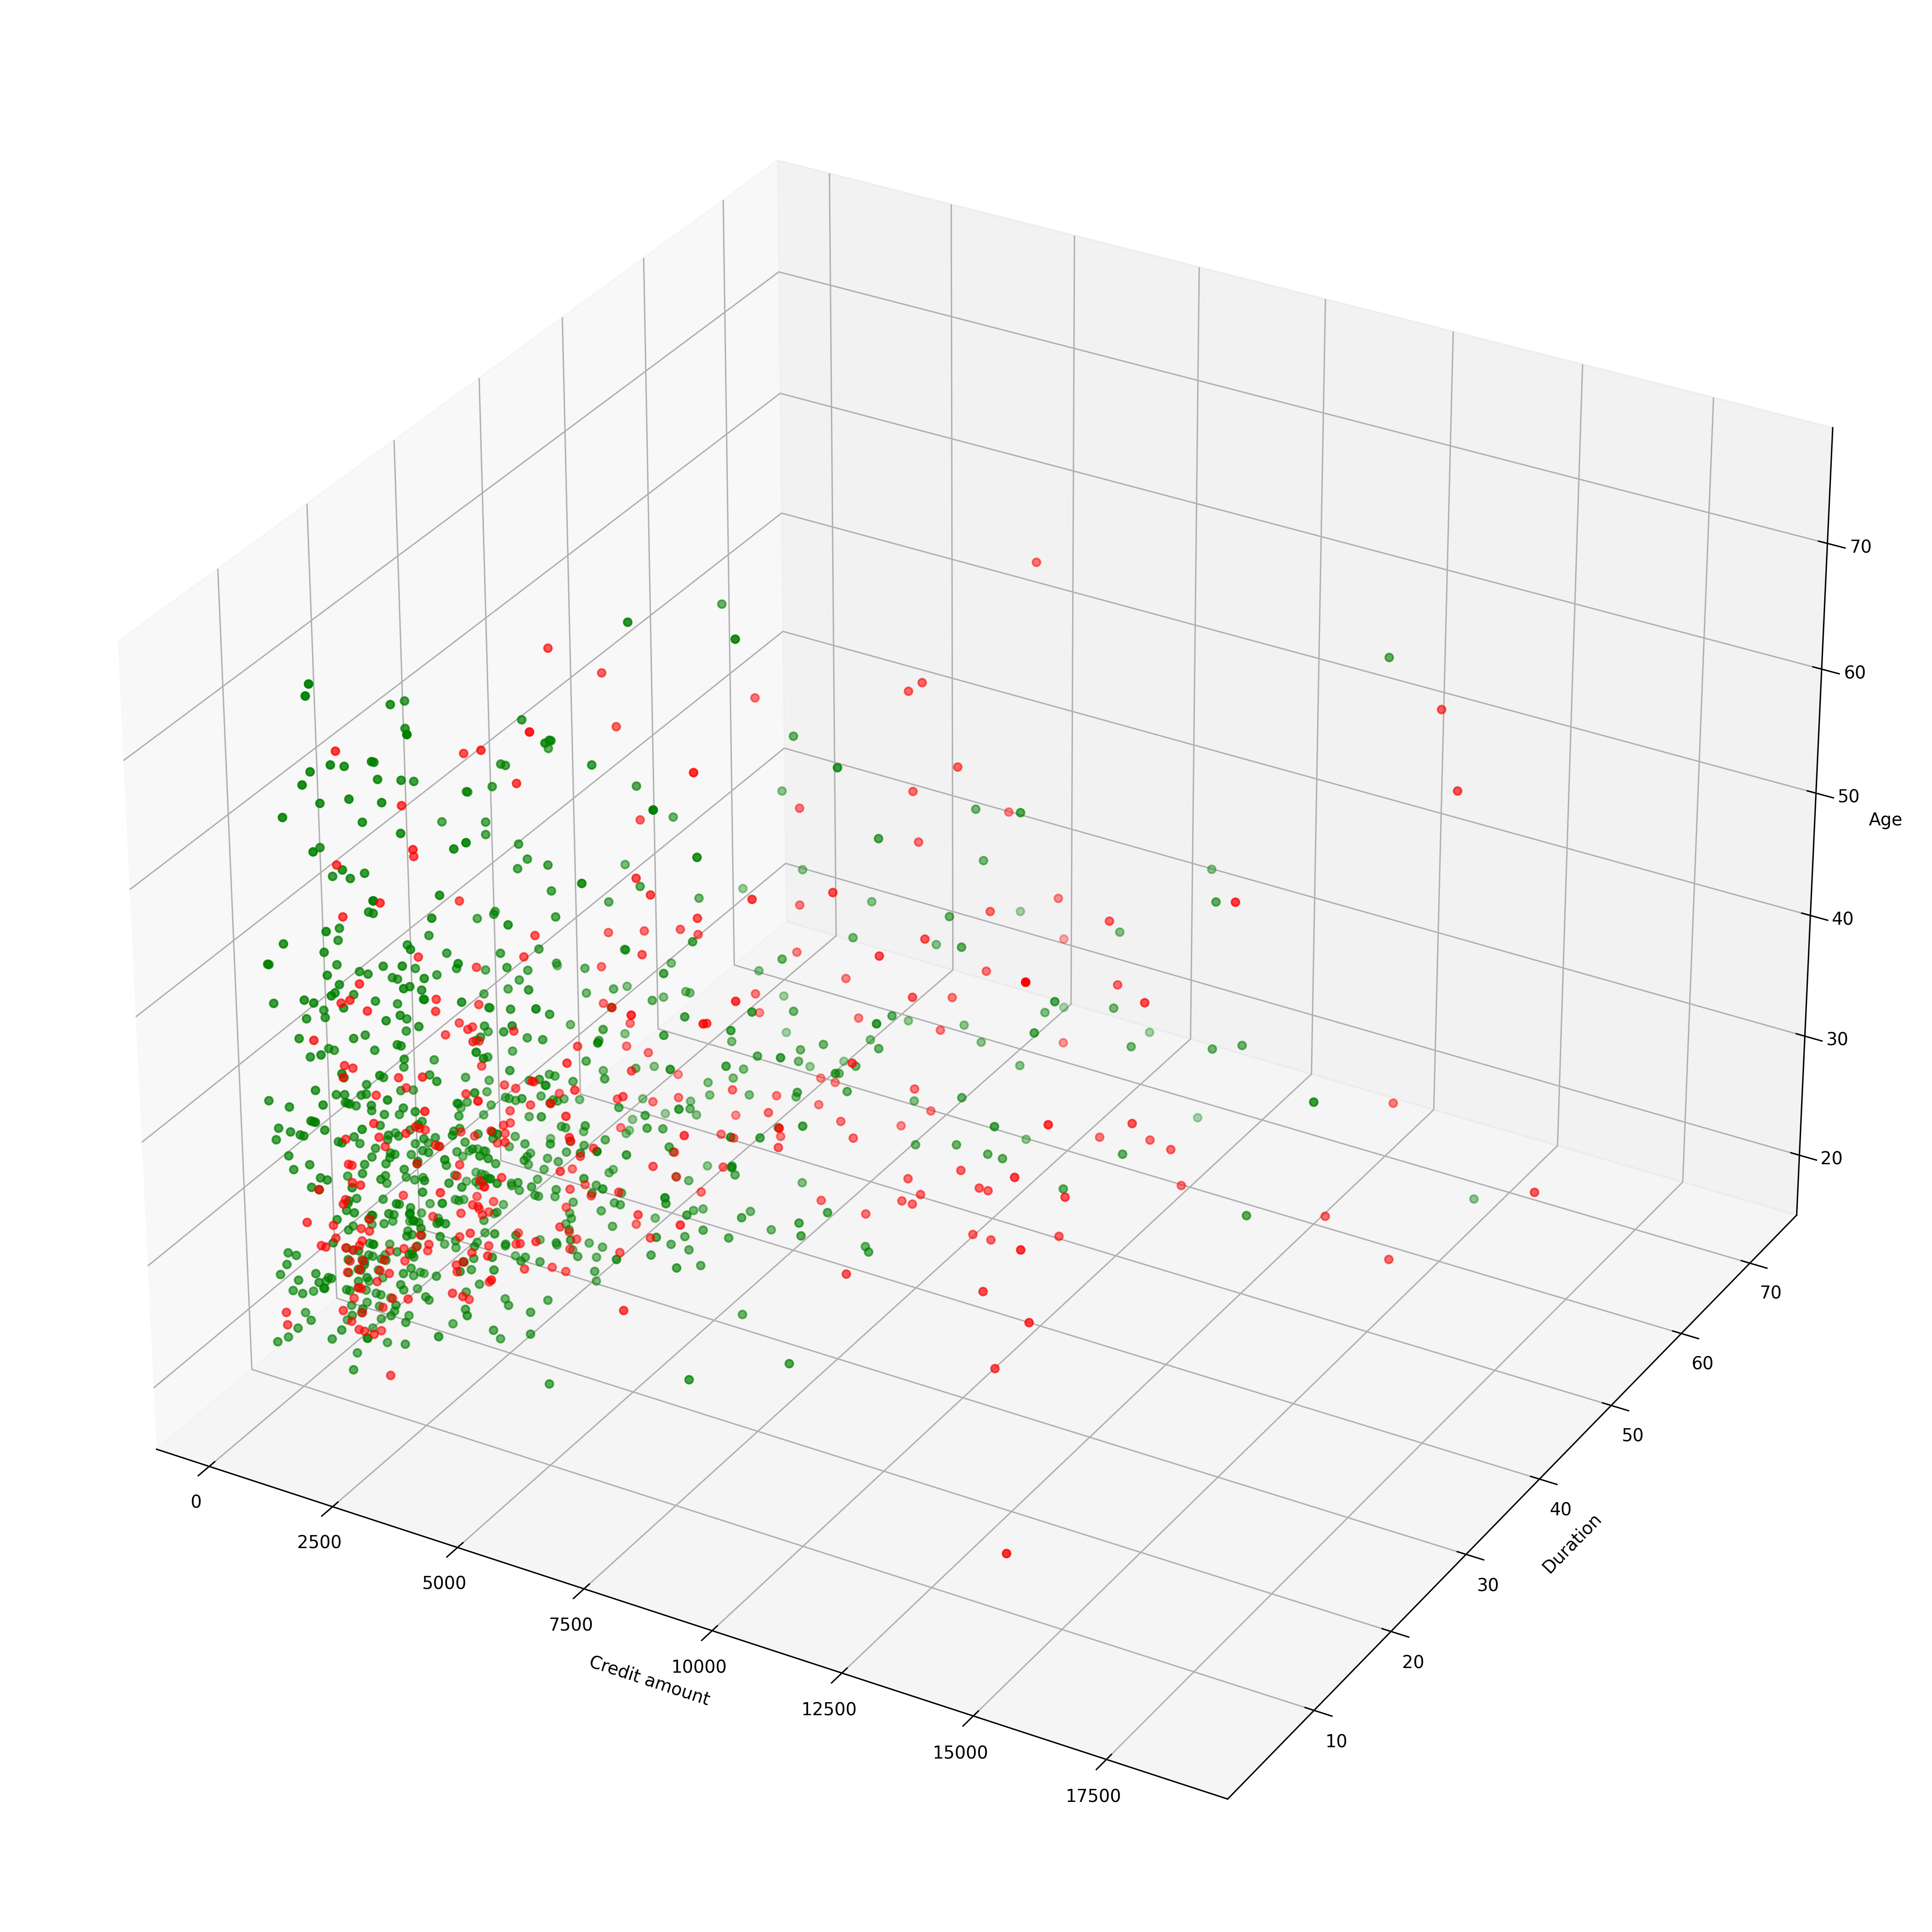

In [512]:
fig = plt.figure(figsize=(20.00, 20.00), dpi=300)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")
ax.scatter(data[data['credit_risk']=='good']['amount'], data[data['credit_risk']=='good']['duration'], zs=data[data['credit_risk']=='good']['age'] ,color='green')
ax.scatter(data[data['credit_risk']=='bad']['amount'], data[data['credit_risk']=='bad']['duration'], zs=data[data['credit_risk']=='bad']['age'],color='red')

# №13

In [513]:
data[porjadkovie[0]] = data[porjadkovie[0]].map({"no checking account":0,
                                                 "... < 0 DM":1,
                                                 "... >= 200 DM / salary for at least 1 year":2,
                                                "0<= ... < 200 DM":3})
data[porjadkovie[1]] = data[porjadkovie[1]].map({"all credits at this bank paid back duly":0,
                                        "no credits taken/all credits paid back duly":1,
                                        "existing credits paid back duly till now":2,
                                        "delay in paying off in the past":3,
                                        "critical account/other credits elsewhere":4})
data[porjadkovie[2]] = data[porjadkovie[2]].map({"unknown/no savings account":0,
                                        "... <  100 DM":1,
                                        "100 <= ... <  500 DM":2,
                                        "... >= 1000 DM":4,
                                        "500 <= ... < 1000 DM":3})
data[porjadkovie[3]] = data[porjadkovie[3]].map({"< 1 yr":1,
                                        "1 <= ... < 4 yrs":2,
                                        "4 <= ... < 7 yrs":3,
                                        "unemployed":0,
                                        ">= 7 yrs":4
                                        })
data[porjadkovie[4]] = data[porjadkovie[4]].map({"< 20":0,
                                        "25 <= ... < 35":2,
                                        "20 <= ... < 25":1,
                                        ">= 35":3
                                        })
data[porjadkovie[5]] = data[porjadkovie[5]].map({">= 7 yrs":3,
                                        "1 <= ... < 4 yrs":1,
                                        "4 <= ... < 7 yrs":2,
                                        "< 1 yr":0
                                        })


In [514]:
for i in range(7):
    print(data[porjadkovie[i]].unique())

[0 1 2 3]
[0 1 2 3 4]
[0 1 2 4 3]
[1 2 3 0 4]
[0 2 1 3]
[3 1 2 0]
[0 1 2 3]


In [515]:
for i in range(4):
    print(data[binarnie[i]].unique())

['no' 'yes (under customer name)']
['no' 'yes']
['good' 'bad']
['0 to 2' '3 or more']


In [516]:
data[binarnie[0]] = data[binarnie[0]].map({"no":0,
                                        "yes (under customer name)":1
                                        })
data[binarnie[1]] = data[binarnie[1]].map({"no":0,
                                        "yes":1
                                        })
data[binarnie[2]] = data[binarnie[2]].map({"bad":0,
                                        "good":1
                                        })
data[binarnie[3]] = data[binarnie[3]].map({"0 to 2":0,
                                        "3 or more":1
                                        })

In [517]:
for i in range(4):
    print(data[binarnie[i]].unique())

[0 1]
[0 1]
[1 0]
[0 1]


In [520]:
for i in range(len(kategorialnie)):
    data.drop(kategorialnie[i], inplace=True, axis=1)
data

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,0,18,0,1049,0,1,0,3,21,0,0,0,0,1
1,0,9,0,2799,0,2,2,1,36,1,1,0,0,1
2,1,12,1,841,1,3,2,3,23,0,0,0,0,1
3,0,12,0,2122,0,2,1,1,39,1,1,0,1,1
4,0,12,0,2171,0,2,0,3,38,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,24,1,1987,0,2,2,3,21,0,1,0,0,0
996,0,24,1,2303,0,4,0,0,45,0,0,0,0,0
997,2,21,0,12680,4,4,0,3,30,0,0,1,0,0
998,1,12,1,6468,4,0,2,0,52,0,0,1,0,0


In [595]:
data['credit_risk'].value_counts()

1    700
0    300
Name: credit_risk, dtype: int64

# №14

In [620]:
def predict(Xtest: np.array) -> np.array:
    p = (0.25 * X_test[:, 2] / (X_test[:, 2].mean()) +
        + 0.25 * X_test[:, 5] / (X_test[:, 5].mean()) + 0.25 * X_test[:, 0] / (X_test[:, 0].mean())+
        0.25 * X_test[:, 4] / (X_test[:, 4].mean()))
    for i in range(len(Xtest)):
        if p[i] < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    return p

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))

/tmp/ipykernel_4985/1372341197.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('credit_risk', 1).values


0.652